In [1]:
import os
import numpy as np
from PIL import Image

# DATASET

In [2]:
eyewear_encode = {'open': 0, "sunglasses":1}

In [3]:
# Training Data
train_files =list(map(lambda x: os.path.join("TrainingSet/",x ),os.listdir("TrainingSet")))

X_train = []
y_train = []

for i in train_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_train.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_train.append(m)
        
# Test Data
test_files =list(map(lambda x: os.path.join("TestSet/",x ), os.listdir("TestSet/")))

X_test = []
y_test = []

for i in test_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_test.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_test.append(m)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

# DECISION TREE

## part a

In [5]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(random_state = 0, max_depth=2) #creating decision tree with mentioned paramaters
decision_tree.fit(X_train,y_train) # fitting training data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [8]:
from sklearn.metrics import accuracy_score
prediction = decision_tree.predict(X_train)
prediction_test = decision_tree.predict(X_test) #predicting values by using decision tree 
train_acc = accuracy_score(y_train, prediction)  #calculation training accuracy 
test_acc = accuracy_score(y_test, prediction_test) #test accuracy

In [6]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.7111111111111111
0.45555555555555555


## part b

__Did your model performs well? Is bias low or high? What about variance?__

It did not perfom well as we see above, it worked in training data better(0.71). We can not say it's really high bias because if it was high bias we would not expect 0.71 training accuracy. In addition, we can say that it is high variance because while we are having good accuracy in training set, we have much lower accuracy in test set.

# BAGGING MODELS

## part c

In [7]:
from sklearn.ensemble import BaggingClassifier
bagging_clf1 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0,max_depth=2),random_state=0,max_features=40, bootstrap = False, bootstrap_features = True)
bagging_clf1.fit(X_train,y_train)  #creating bagging classifier with decision tree classifier and it's parameters
#then fitting training data to model

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=False, bootstrap_features=True, max_features=40,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

## part d

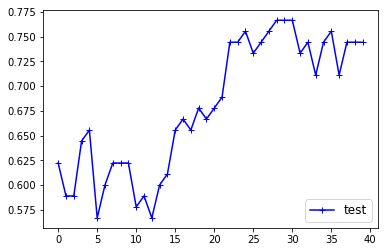

In [8]:
# PLOT
from sklearn.ensemble import BaggingClassifier
accuracy_list = []
train_list = []
for i in range (1,41):  #trying number of models by using for loop
    bagging_clf1 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0,max_depth=2),random_state=0,n_estimators=i, max_features=40, bootstrap = False, bootstrap_features = True)
    bagging_clf1.fit(X_train,y_train)  #n_estimator decides how many models will be used, so i put it i also this model
    predictiontrain = bagging_clf1.predict(X_train) #also this model sampling features but not instances
    predictiontest = bagging_clf1.predict(X_test) # predictions for each number of model in test data
    train_accuracy = accuracy_score(y_train, predictiontrain) #calculation of training accuracy for each number of models
    test_accuracy = accuracy_score(y_test,predictiontest)#calculation of test accuracy for each number of models
    accuracy_list.append(test_accuracy) #appending training accuracy into list
    train_list.append(train_accuracy) # appending test accuracy into list
import matplotlib
import matplotlib.pyplot as plt
plt.plot(accuracy_list,"b-+", label='test') # plotting for test accuracy by using accuracy list
plt.legend(loc="lower right", fontsize=12)  
plt.show()


## part e

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model  which has the best number of models.__

If I only observe the test data I would say between 29,30,31 but I wanted to make sure and tried with training data and saw so similar range as I saw in test data. So the best number is 30. If I need pick one of it it is 30. And I will find accuracies for 30 models.

In [9]:
bagging_clf30 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0,max_depth=2),random_state=0,n_estimators=30,max_features=40, bootstrap = False, bootstrap_features = True)
bagging_clf30.fit(X_train,y_train) #creating bagging model with best number of estimators 
best_predictiontrain = bagging_clf30.predict(X_train)
best_predictiontest = bagging_clf30.predict(X_test)  #predictions and calculations for accuracy
train_acc = accuracy_score(y_train, best_predictiontrain)
test_acc = accuracy_score(y_test,best_predictiontest)

In [10]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.9111111111111111
0.7666666666666667


## part f

__Compare the decision tree classifier in part a and best bagging classifier in part e in terms of accuracy, bias, and variance.__

Here both accuraccy increased in training and test as compared to part a. we can say that it's not much high variance and there is low bias because both accuracies are high.

## part g

In [11]:
bagging_clf2 =  BaggingClassifier(tree.DecisionTreeClassifier(random_state=0,max_depth=2),random_state=0,max_samples = 1.0,max_features=40, bootstrap = True, bootstrap_features = False)
#creating bagging for sampling instances but not features

## part h

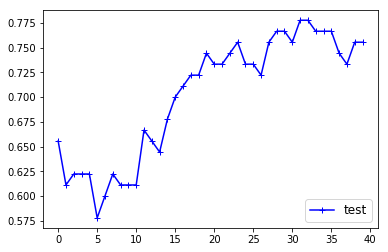

In [12]:
# PLOT
accuracy_list2 = []
train_list2 = []
for k in range (1,41):
    bagging_clf2 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0,max_depth=2),n_estimators=k,random_state=0,max_samples = 1.0,max_features=40, bootstrap = True, bootstrap_features = False)
    bagging_clf2.fit(X_train,y_train)
    predictiontrain2 = bagging_clf2.predict(X_train) #same thing I have done above but only difference here model 
    predictiontest2 = bagging_clf2.predict(X_test) # sampling instances not features here
    train_accuracy2 = accuracy_score(y_train, predictiontrain2)
    test_accuracy2 = accuracy_score(y_test,predictiontest2)
    accuracy_list2.append(test_accuracy2)
    train_list2.append(train_accuracy2)
import matplotlib
import matplotlib.pyplot as plt
plt.plot(accuracy_list2,"b-+", label='test') 
plt.legend(loc="lower right", fontsize=12)  # for text
plt.show()

In [13]:
print accuracy_list2 
print train_list2 

[0.6555555555555556, 0.6111111111111112, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.5777777777777777, 0.6, 0.6222222222222222, 0.6111111111111112, 0.6111111111111112, 0.6111111111111112, 0.6666666666666666, 0.6555555555555556, 0.6444444444444445, 0.6777777777777778, 0.7, 0.7111111111111111, 0.7222222222222222, 0.7222222222222222, 0.7444444444444445, 0.7333333333333333, 0.7333333333333333, 0.7444444444444445, 0.7555555555555555, 0.7333333333333333, 0.7333333333333333, 0.7222222222222222, 0.7555555555555555, 0.7666666666666667, 0.7666666666666667, 0.7555555555555555, 0.7777777777777778, 0.7777777777777778, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7444444444444445, 0.7333333333333333, 0.7555555555555555, 0.7555555555555555]
[0.6761904761904762, 0.7523809523809524, 0.7492063492063492, 0.8063492063492064, 0.8095238095238095, 0.8095238095238095, 0.834920634920635, 0.834920634920635, 0.8539682539682539, 0.8603174603174604, 0.8761904761904762, 0.87619047

## part i

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model which has the best number of models.__

The best number for the number of models is 33. There are again several same values but I also checked training data and I decided to pick 33. So I will calculate accuracy for 33 models!

In [14]:
bagging_clf_best = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0,max_depth=2),n_estimators=33,random_state=0,max_samples = 1.0,max_features=40, bootstrap = True, bootstrap_features = False)
bagging_clf_best.fit(X_train,y_train)  #n estimators = 33 so it's my best parameters for bagging model with sampling instances not features
best_predictiontrain = bagging_clf_best.predict(X_train)
best_predictiontest = bagging_clf_best.predict(X_test) #predictions for training and test data with best number of models 
train_acc = accuracy_score(y_train, best_predictiontrain) # accuracy scores for training and test data
test_acc = accuracy_score(y_test,best_predictiontest)

In [15]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.9238095238095239
0.7777777777777778


## part j

__Compare the decision tree classifier in part a and best bagging classifier in part i in terms of accuracy, bias, and variance.__

Same situation is valid here as it happened in part e. But it is better than part e because of sampling training instances. So both training and test accuracy increased but not in same amount. We can consider as a good accuracy. Bias is not high as well. There is no high variance.

## part k

__Compare two bagging models that you found in part e and part i in terms of accuracy, bias, and variance.__

In part i, we can observe a little bit rise we can still say that models in part i is better than part e in accuracy because of sampling instances. Also, we can say that in part e bias is higher than part i and about variance it's same. Models in part i just little bit better than part e.

## part l

__How sampling features and sampling instances affected the performance of your model? Why?__

 It increased performance because of reducing selection/dimensionality on sample sets. Also, we increased training accuracy as well. Because when we sample it we increase the computing power and randomly select instances or features whatever we sample etc.

# BOOSTING MODELS

## part m

In [6]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2),random_state=0) #creating adaptive boosting model

## part n

In [19]:
accuracy_list_ada = []
train_list_ada = []
for k in range (1,51):
    adaboost_clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2),n_estimators=k,random_state=0)
    adaboost_clf.fit(X_train,y_train) # looking for best number of models from 1 to 50
    predictiontrain_ada = adaboost_clf.predict(X_train) # predicting values for training and test data
    predictiontest_ada = adaboost_clf.predict(X_test)
    train_accuracy_ada = accuracy_score(y_train, predictiontrain_ada) #
    test_accuracy_ada = accuracy_score(y_test,predictiontest_ada)
    accuracy_list_ada.append(test_accuracy_ada)
    train_list_ada.append(train_accuracy_ada)
print train_list_ada #9,41
print accuracy_list_ada #9,41
    

[0.7111111111111111, 0.8476190476190476, 0.9047619047619048, 0.9555555555555556, 0.9714285714285714, 0.9841269841269841, 0.9936507936507937, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.45555555555555555, 0.6111111111111112, 0.5666666666666667, 0.5777777777777777, 0.6222222222222222, 0.6333333333333333, 0.5666666666666667, 0.5888888888888889, 0.6666666666666666, 0.5888888888888889, 0.5777777777777777, 0.6333333333333333, 0.6222222222222222, 0.6, 0.6, 0.6222222222222222, 0.5777777777777777, 0.6333333333333333, 0.6111111111111112, 0.6333333333333333, 0.5777777777777777, 0.6, 0.6111111111111112, 0.6111111111111112, 0.5888888888888889, 0.6111111111111112, 0.6222222222222222, 0.6222222222222222, 0.6444444444444445, 0.5888888888888889, 0.6555555555555556, 0.6555555555555556, 0.6111111111111112, 0.6333333333333333, 0.63333

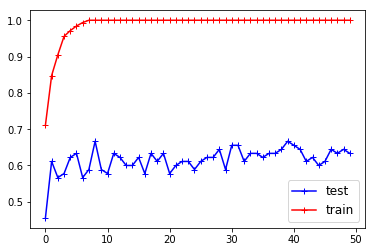

In [20]:
# PLOT
import matplotlib
import matplotlib.pyplot as plt
plt.plot(accuracy_list_ada,"b-+", label='test') # and here for test data
plt.plot(train_list_ada,"r-+", label='train') # and here for train data
plt.legend(loc="lower right", fontsize=12)  # for labels
plt.show()

## part o

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Report train and test accuracy of the boosting model which has the best number of models.__

The best number for the number of models are exactly 9 and 40. They both have exactly same accuracy in both data set(trainnig,test). About traninig set, it reaches the highest accuracy first time with 9 models and it remains like this. In test set, with 9 models it reaches to peak as well then fluctuating and reaching peak again with 40 models. So, I will pick 40 models as a best number of models and report the train and test accuracy. 

In [11]:
adaboost_clf_40 = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2),n_estimators=40,random_state=0)
adaboost_clf_40.fit(X_train,y_train) #creating model with best number of models
predictiontrain_40 = adaboost_clf_40.predict(X_train) # prediction for training data
predictiontest_40 = adaboost_clf_40.predict(X_test) # prediction for test data
train_acc = accuracy_score(y_train, predictiontrain_40) 
test_acc =accuracy_score(y_test,predictiontest_40)

In [10]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

1.0
0.6666666666666666


# STACKING

## part p

In [13]:
from sklearn.model_selection import train_test_split
train_set_1, train_set_2, train_y_1, train_y_2 = train_test_split(X_train, y_train, test_size=0.5, random_state=0) 
#splitting data by half for train and for test

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression(random_state= 0, C = 0.001,penalty = 'l2', solver = 'saga').fit(train_set_1,train_y_1) #creating logistic regression model
svc_clf = SVC(random_state= 0, C = 0.1, decision_function_shape = 'ovo', kernel = 'poly', tol = 0.0001, probability = True).fit(train_set_1,train_y_1)
#creating svc model here with mentioned parameters

C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dogancan\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
# DON'T REMOVE THIS CELL
print(sum(train_set_1))
print(sum(train_set_2))
print(sum(train_y_1))
print(sum(train_y_2))

[126 212  77 ... 231 145 182]
[ 72 133 179 ... 189  52 160]
76
82


## part q

In [16]:
logprob = log_clf.predict_proba(train_set_2) #having probabilistic predictions using logistic regression model
svcprob = svc_clf.predict_proba(train_set_2) #having probabilsitic predictions using svc model 

for i in range(len(train_set_2)):
    #print("log=%s, Predicted=%s" % (train_set_2[i], logprob[i])) 
    #print("svc=%s, Predicted=%s" % (train_set_2[i], svcprob[i]))
    logprob[i][1] = svcprob[i][0] # merge values as it's mentioned in assignment like [0,3 0,7]

In [17]:
new_train_set_2 = logprob # creating new data
#print new_train_set_2

In [18]:
from sklearn.ensemble import RandomForestClassifier
blender = RandomForestClassifier(random_state=0,max_depth=1,n_estimators=10) # creating random forest model for blender
blender.fit(new_train_set_2,train_y_2) #fitting data into blender

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
# DON'T REMOVE THIS CELL
print(sum(new_train_set_2))

[76.8927692  73.44946142]


## part r

In [30]:
logprob_test = log_clf.predict_proba(X_test)   #having probabilistic predictions for test data using logistic regression model
svcprob_test = svc_clf.predict_proba(X_test) #having probabilsitic predictions for test data using svc model

for i in range(len(X_test)):
    #print("log0=%s, Predicted=%s" % (train_set_2[i], logprob[i]))
    #print("svc=%s, Predicted=%s" % (train_set_2[i], svcprob[i]))
    logprob_test[i][1] = svcprob_test[i][0] #merge values as it's mentioned in assignment like [0,3 0,7]
new_test_set = logprob_test

In [36]:
from sklearn.metrics import accuracy_score,f1_score
finalpredictions = blender.predict(new_test_set) #having probabilistic predictions by using random forest blender

In [37]:
test_acc = accuracy_score(finalpredictions, y_test) # test accuracy
test_f1 = f1_score(finalpredictions, y_test) # f1 score

In [38]:
# DON'T REMOVE THIS CELL
print("\nTest Scores:")
print(test_acc)
print(test_f1)


Test Scores:
0.8111111111111111
0.7848101265822784


__Did stacking model perform well?__

Stacking model performed well as it is seen accuracy increased. we got 0.81 test accuracy which the best accuracy I got as compared to previous ones I have done above with other models.